In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

dataset1_origin = np.load('npz/dataset1_origin.npz', allow_pickle=True)
dataset1_horizon = np.load('npz/dataset1_horizon.npz', allow_pickle=True)
dataset1_vertical = np.load('npz/dataset1_vertical.npz', allow_pickle=True)
dataset1_vh = np.load('npz/dataset1_vh.npz', allow_pickle=True)
dataset2_origin = np.load('npz/dataset2_origin.npz', allow_pickle=True)
dataset2_horizon = np.load('npz/dataset2_horizon.npz', allow_pickle=True)
dataset2_vertical = np.load('npz/dataset2_vertical.npz', allow_pickle=True)
dataset2_vh = np.load('npz/dataset2_vh.npz', allow_pickle=True)

d1o_origin_images, d1o_target_images, d1o_number_labels, d1o_coordinates = dataset1_origin['images'], dataset1_origin['filters'], dataset1_origin['numbers'],  dataset1_origin['coordinates']
d1h_origin_images, d1h_target_images, d1h_number_labels, d1h_coordinates = dataset1_horizon['images'], dataset1_horizon['filters'], dataset1_horizon['numbers'],  dataset1_horizon['coordinates']
d1v_origin_images, d1v_target_images, d1v_number_labels, d1v_coordinates = dataset1_vertical['images'], dataset1_vertical['filters'], dataset1_vertical['numbers'],  dataset1_vertical['coordinates']
d1vh_origin_images, d1vh_target_images, d1vh_number_labels, d1vh_coordinates = dataset1_vh['images'], dataset1_vh['filters'], dataset1_vh['numbers'],  dataset1_vh['coordinates']
d2o_origin_images, d2o_target_images, d2o_number_labels, d2o_coordinates = dataset2_origin['images'], dataset2_origin['filters'], dataset2_origin['numbers'],  dataset2_origin['coordinates']
d2h_origin_images, d2h_target_images, d2h_number_labels, d2h_coordinates = dataset2_horizon['images'], dataset2_horizon['filters'], dataset2_horizon['numbers'],  dataset2_horizon['coordinates']
d2v_origin_images, d2v_target_images, d2v_number_labels, d2v_coordinates = dataset2_vertical['images'], dataset2_vertical['filters'], dataset2_vertical['numbers'],  dataset2_vertical['coordinates']
d2vh_origin_images, d2vh_target_images, d2vh_number_labels, d2vh_coordinates = dataset2_vh['images'], dataset2_vh['filters'], dataset2_vh['numbers'],  dataset2_vh['coordinates']

origin_images = np.concatenate([d1o_origin_images, d2o_origin_images, d1h_origin_images, d2h_origin_images, d1v_origin_images, d2v_origin_images, d1vh_origin_images, d2vh_origin_images], axis = 0)
target_images = np.concatenate([d1o_target_images, d2o_target_images, d1h_target_images, d2h_target_images, d1v_target_images, d2v_target_images, d1vh_target_images, d2vh_target_images], axis = 0)
numbers_labels = np.concatenate([d1o_number_labels, d2o_number_labels, d1h_number_labels, d2h_number_labels, d1v_number_labels, d2v_number_labels, d1vh_number_labels, d2vh_number_labels], axis = 0)
coordinates = np.concatenate([d1o_coordinates, d2o_coordinates, d1h_coordinates, d2h_coordinates, d1v_coordinates, d2v_coordinates, d1vh_coordinates, d2vh_coordinates], axis = 0)


2024-01-10 08:13:36.894993: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 08:13:36.938067: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-10 08:13:37.656722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# print(coordinates[13000].shape[0])

copy_coord = coordinates[13000]

new_coords = []
changed_coords = []
for i in range(copy_coord.shape[0]):
    copy_coord[i]
    x_coords = copy_coord[i][0::2]
    y_coords = copy_coord[i][1::2]

    xmin, xmax = min(x_coords), max(x_coords)
    ymin, ymax = min(y_coords), max(y_coords)
    new_coords.append([xmin, ymin, xmax, ymax])

boxes = np.array(new_coords)
print(boxes)


[[21  9 31 16]
 [ 0 19  4 24]
 [ 0 12  7 19]
 [ 0  0  0  0]]


(1, 24, 32)


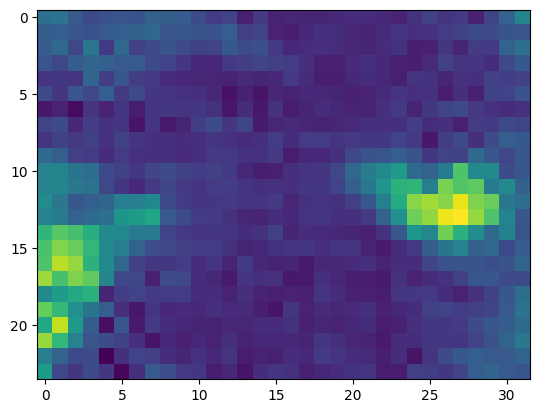

In [3]:
print(origin_images[13000:13001].shape)
plt.imshow(origin_images[13000])
plt.show()

2024-01-10 08:13:49.396954: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22292 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1d:00.0, compute capability: 8.6
2024-01-10 08:13:49.398733: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22292 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1f:00.0, compute capability: 8.6
2024-01-10 08:13:49.400283: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22292 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:20:00.0, compute capability: 8.6
2024-01-10 08:13:49.401816: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22292 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

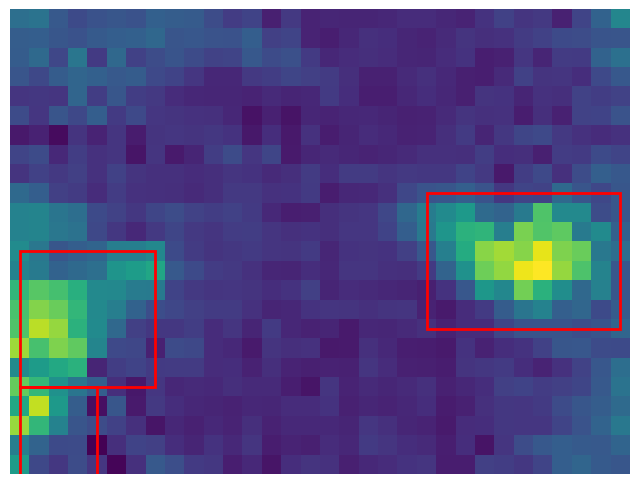

In [4]:
plt.figure(figsize = (8, 8))
plt.axis('off')
plt.imshow(origin_images[13000])
ax = plt.gca()
boxes = tf.stack(
	[
	 boxes[:, 0],
	 boxes[:, 1],
	 boxes[:, 2],
	 boxes[:, 3]
	], axis = -1
)
for box in boxes:
	xmin, ymin = box[:2]
	w, h = box[2:] - box[:2]
	patch = plt.Rectangle(
		[xmin, ymin], w, h, fill = False, edgecolor = [1, 0, 0], linewidth = 2
	)
	ax.add_patch(patch)
plt.show()

In [5]:
bboxes = []
for coords in coordinates:
    new_coords = []  # 각 coords 집합에 대해 new_coords를 초기화
    for i in range(coords.shape[0]):
        x_coords = coords[i][0::2]
        y_coords = coords[i][1::2]

        xmin, xmax = min(x_coords), max(x_coords)
        ymin, ymax = min(y_coords), max(y_coords)
        new_coords.append([xmin, ymin, xmax, ymax])
    
    bboxes.append(new_coords)  # 변환된 좌표 추가

bboxes = np.array(bboxes)
print(coordinates.shape)
print(bboxes.shape)
# np.savez('npz/ObjectDetection.npz', images=origin_images, numbers=numbers_labels, bbox = bboxes)


(13276, 4, 8)
(13276, 4, 4)


In [14]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print(a[:-3])

[1, 2, 3, 4, 5, 6]


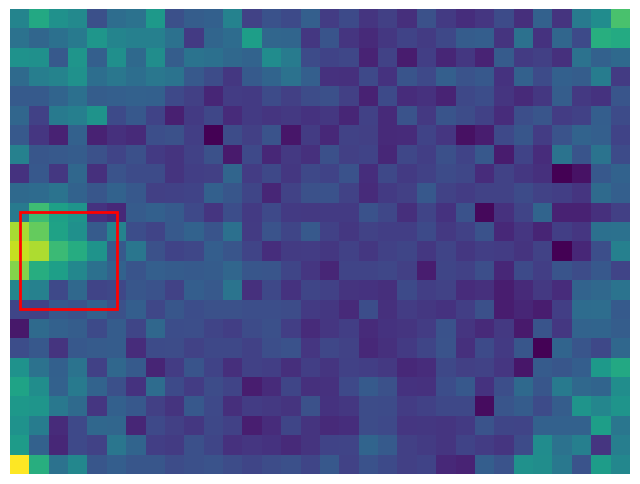

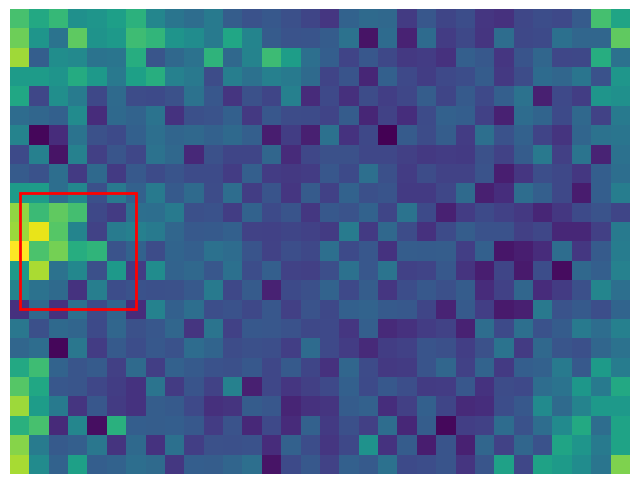

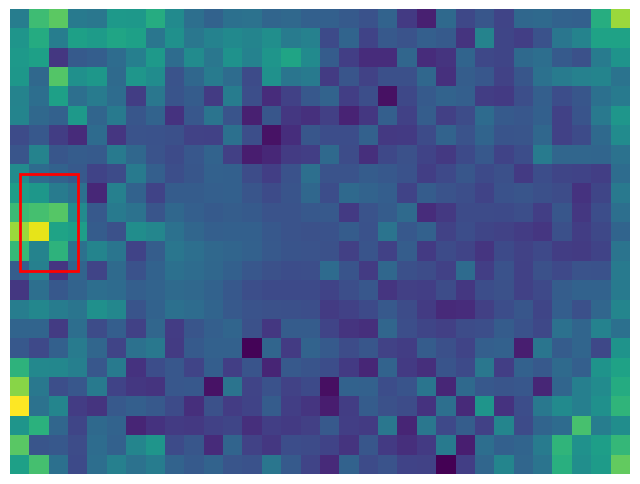

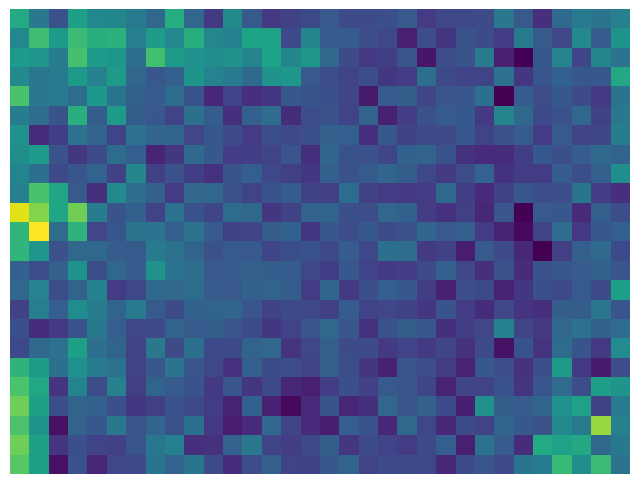

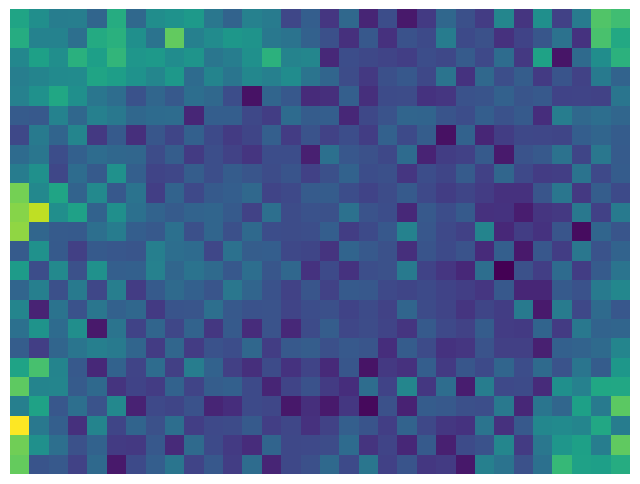

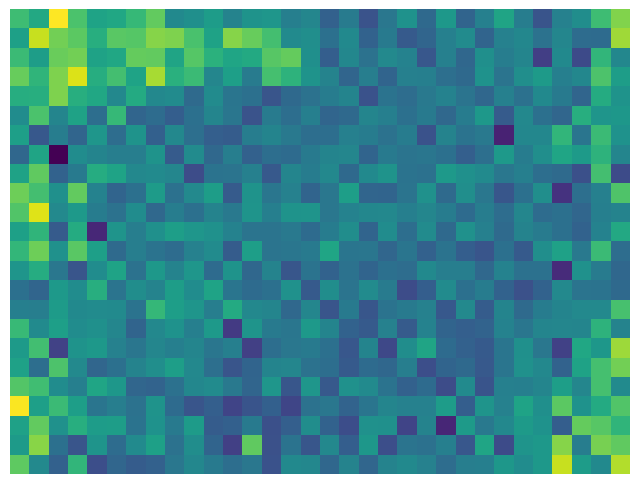

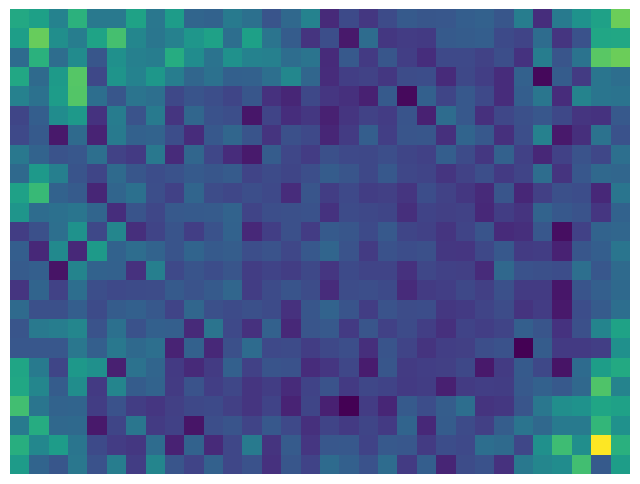

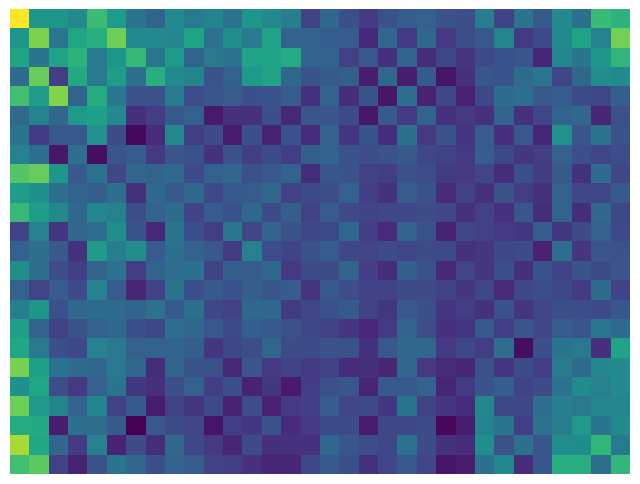

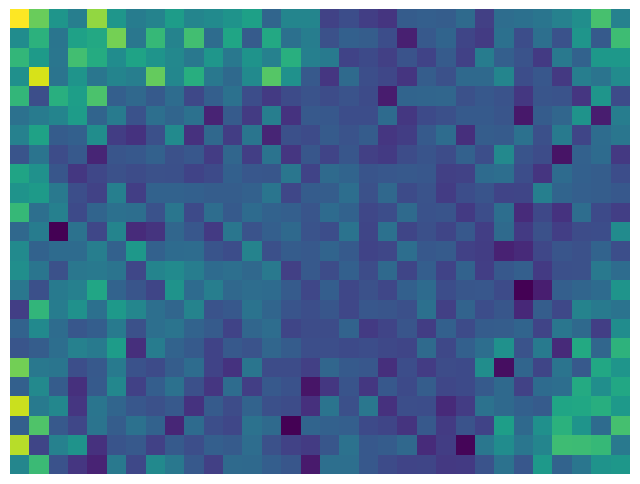

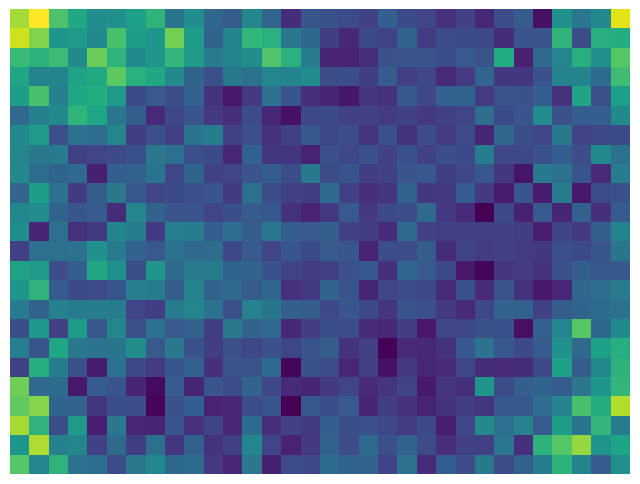

In [15]:
for img, boxes in zip(origin_images[-10:], bboxes[-10:]):
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(img)  # 여기를 수정
    ax = plt.gca()
    
    for box in boxes:
        xmin, ymin = box[:2]
        w, h = box[2:] - box[:2]
        patch = plt.Rectangle(
            [xmin, ymin], w, h, fill=False, edgecolor=[1, 0, 0], linewidth=2
        )
        ax.add_patch(patch)
    plt.show()

In [16]:
np.savez('npz/ObjectDetection.npz', images=origin_images, numbers=numbers_labels, bboxes = bboxes)

origin_images.shape, numbers_labels.shape, bboxes.shape

((13276, 24, 32), (13276,), (13276, 4, 4))